In [53]:
import numpy as np
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from datafilereader import DataFileReader

folder = "./dataset"

labels = ["unknown", "5_CTS", "10_CTS", "20_CTS", "50_CTS", "1_CHF", "2_CHF", "5_CHF"]

In [54]:
#load the training set
with open('dataset/trainingset.pkl', 'rb') as f:
    X, Y = pickle.load(f)

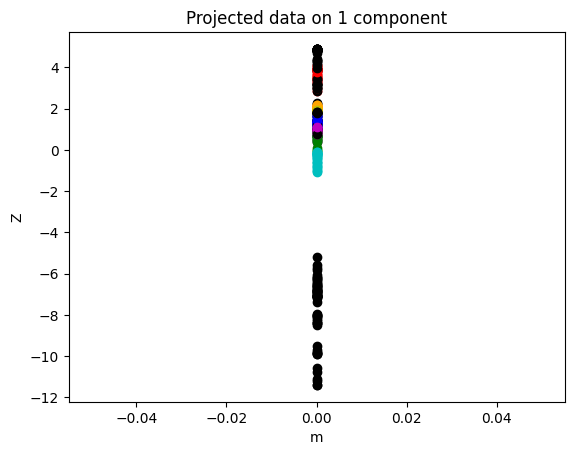

In [55]:
#visualize the data using PCA
def featureNormalize(X):
    #plots the data points and gives the figure axes labels of population and profit.
    # Input:
    # - X [mxn] matrix of features (n=2)
    # Output:
    # - Xs [mxn] matrix of features scaled
    # - mean [1xn] mean vector
    # - sigma [1xn] standard deviation vector
    mu  = np.mean(X,axis=0)
    sigma = np.std(X,axis=0,ddof=1)
    Xs = (X-mu)/sigma
    
    return Xs,mu,sigma

def pca(X):
    # computes eigenvectors of the covariance matrix of X
    # Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    # Input:
    # - X [m,n] data set
    # Output:
    # - U [n,n] matrix of eigen vectors (each column is a vector)
    # - S [n,] vector of eigenvalues
    
    U = np.zeros((X.shape[1],X.shape[1]))
    S = np.zeros(X.shape[1])
    
    #-- your work --
    #compute the covariance matrix
    m = X.shape[0]
    cov = np.dot(X.T,X)/m
    #compute the eigenvectors and eigenvalues
    U,S,V = np.linalg.svd(cov)
        
    #---------------
    
    return U,S

def projectData(X,U,K):
    # Computes the reduced data representation when projecting only 
    # on to the top k eigenvectors. It returns the projected examples in Z.
    # Input:
    # - X : [m,n] data set
    # - U : [n,n] matrix of eigen vector
    # - K : number of components to keep
    # Output:
    # - Z : [m,K] projected data set on the K first components
    
    Z = np.zeros((X.shape[0],K))
    
    #-- your work --
    #project the data
    Z = np.dot(X,U[:,:K])
        
    #---------------
    return Z

Xn, mu,_ = featureNormalize(X)
U,S = pca(Xn)
K = 1
Z = projectData(Xn,U,K)

plt.figure()
colors = ['k','r','g','b','c','m','y','orange']
for i in range(len(Y)):
    plt.plot(Z[i],colors[Y[i]],marker='o',linestyle='None')
plt.title('Projected data on %g component'%(K))
plt.xlabel('m')
plt.ylabel('Z')
plt.show()


In [56]:
#train the SVM model using sikit-learn library
C = 0.2
clf = svm.SVC(kernel='linear', C =C)
model = clf.fit(X, Y)

In [57]:
#model prediction with the validationset

with open('dataset/validationset.pkl', 'rb') as f:
    X_valid, Y_valid = pickle.load(f)
Y_pred = model.predict(X_valid)

#results
accuracy = accuracy_score(Y_valid, Y_pred)
print(f"Accuracy: {accuracy}")

#classification report
report = classification_report(Y_valid, Y_pred)
print("Classification Report:\n", report)

#confusion matrix
conf_matrix = confusion_matrix(Y_valid, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7428571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        46
           1       1.00      1.00      1.00         8
           2       0.71      0.56      0.62         9
           3       1.00      1.00      1.00         6
           4       1.00      0.80      0.89        10
           5       0.56      0.71      0.62         7
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        11

    accuracy                           0.74       105
   macro avg       0.62      0.63      0.62       105
weighted avg       0.63      0.74      0.67       105

Confusion Matrix:
 [[46  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0]
 [ 0  0  5  0  0  4  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 2  0  0  0  8  0  0  0]
 [ 0  0  2  0  0  5  0  0]
 [ 8  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
